## Image Preprocessing

- In this notebook, each membrane marker is run independently with the DAPI nuclear marker
- Loading the .tif file in Qupath, each seperate image was filtered using grayscale option
- Each image was then exported as a Rendered RBG jpg 




In [84]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image 

#manually read in images (will automate later)
dapi = mpimg.imread("DAPI_1.jpg")
pdl1 = mpimg.imread("PD_L1_1.jpg")
cd8 = mpimg.imread("CD8_1.jpg")
ck = mpimg.imread("CK_1.jpg")
cd68 = mpimg.imread("CD68_1.jpg")
cd3 = mpimg.imread("CD3_1.jpg")


original_length = dapi.shape[0]
original_width = dapi.shape[1]

#convert to Image
dapi = Image.fromarray(dapi)
pdl1 = Image.fromarray(pdl1)
cd8 = Image.fromarray(cd8)
ck = Image.fromarray(ck)
cd68 = Image.fromarray(cd68)
cd3 = Image.fromarray(cd3)

#resize to square shape
sqrWidth = np.ceil(np.sqrt(dapi.size[0]*dapi.size[1])).astype(int)
dapi = dapi.resize((sqrWidth, sqrWidth))
pdl1 = pdl1.resize((sqrWidth, sqrWidth))
cd8 = cd8.resize((sqrWidth, sqrWidth))
ck = ck.resize((sqrWidth, sqrWidth))
cd68 = cd68.resize((sqrWidth, sqrWidth))
cd3 = cd3.resize((sqrWidth, sqrWidth))

#Convert back to array
dapi = np.array(dapi)
pdl1 = np.array(pdl1)
cd8 = np.array(cd8)
ck = np.array(ck)
cd68 = np.array(cd68)
cd3 = np.array(cd3)

#resize to 2D to stack images
dapi = dapi[:,...,0]
pdl1 = pdl1[:,...,0]
cd8 = cd8[:,...,0]
ck = ck[:,...,0]
cd68 = cd68[:,...,0]
cd3 = cd3[:,...,0]


### Add missing axes
- add channel axis (4th) and FOV axis (1st)

- DAPI will act as the nuclear marker, paired with each membrane marker





- marker1 = PD-L1 (with dapi in first channel)
- marker2 = CD8 ...
- marker3 = CK ...
- marker4 = CD68 ...
- marker5 = CD3 ...



In [85]:
dapi = dapi[np.newaxis, ..., np.newaxis]
pdl1 = pdl1[np.newaxis, ...]
cd8 = cd8[np.newaxis, ...]
cd3 = cd3[np.newaxis, ...]
cd68 = cd68[np.newaxis,...]
ck = ck[np.newaxis,...]


marker1 = np.repeat(dapi, 2, axis = 3)
marker2 = np.repeat(dapi, 2, axis = 3)
marker3 = np.repeat(dapi, 2, axis = 3)
marker4 = np.repeat(dapi, 2, axis = 3)
marker5 = np.repeat(dapi, 2, axis = 3)


marker1[:,...,1] = pdl1
marker2[:,...,1] = cd8
marker3[:,...,1] = ck
marker4[:,...,1] = cd68
marker5[:,...,1] = cd3


## Data Input:
- [FOV, row, column, channel]
- Field of view: region of slide
- Row pixel number of image
- Column pixel number of image
- Channel: nuclear or membrane

#### Initialization of multiplex model using pretrained weights

In [86]:
from deepcell.applications import MultiplexSegmentation
app = MultiplexSegmentation(use_pretrained_weights=True) 

In [87]:
print('Training Resolution:', app.model_mpp, 'microns per pixel')

Training Resolution: 0.5 microns per pixel


## Segmentation Prediction

### DAPI

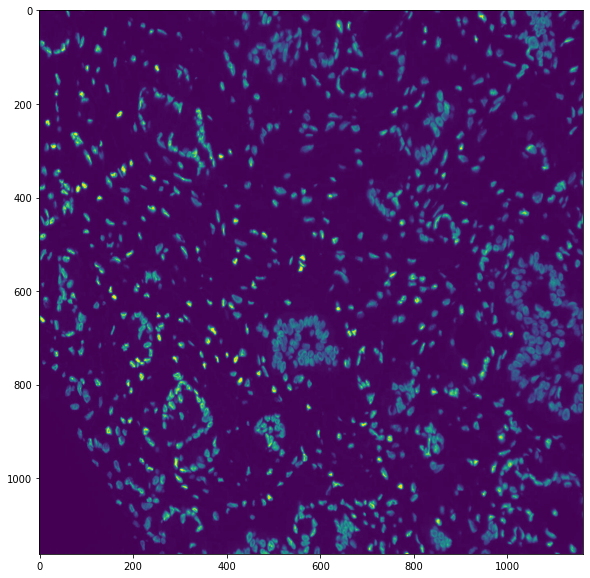

In [88]:
plt.figure(figsize = (10,10))
plt.imshow(marker1[0,...,0])

### Marker 1: PD-L1

Text(0.5, 1.0, 'Segmented (with DAPI nuclear marker)')

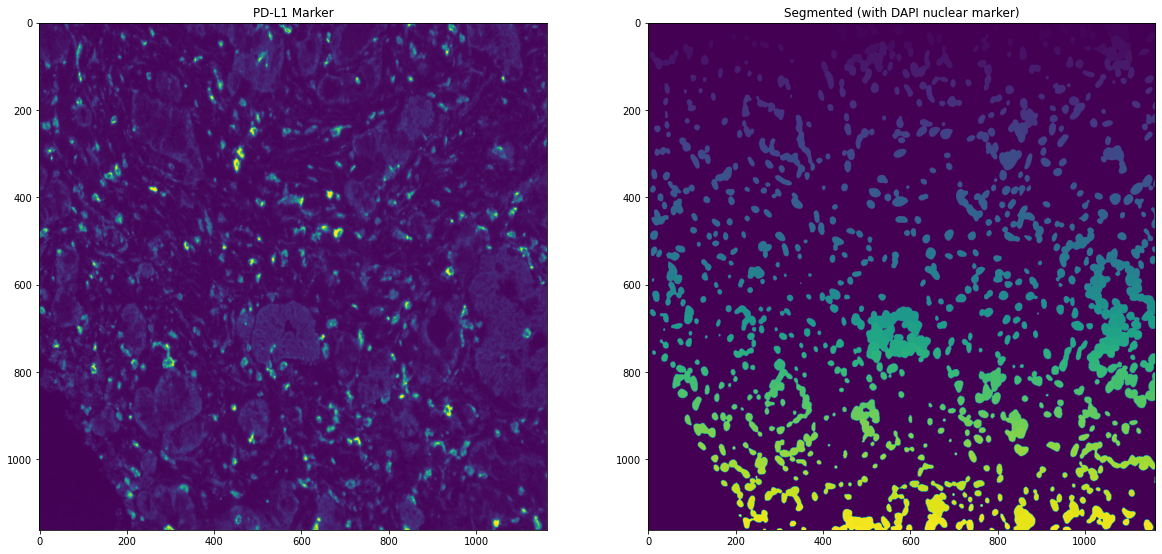

In [89]:
labeled_marker1 = app.predict(marker1, image_mpp=0.5)
fig, ax = plt.subplots(1,2, figsize=(20, 20))
ax[0].imshow(marker1[0,...,1])
ax[0].set_title("PD-L1 Marker")
ax[1].imshow(labeled_marker1[0,...,0])
ax[1].set_title("Segmented (with DAPI nuclear marker)")

### Marker 2: CD8

Text(0.5, 1.0, 'Segmented (with DAPI nuclear marker)')

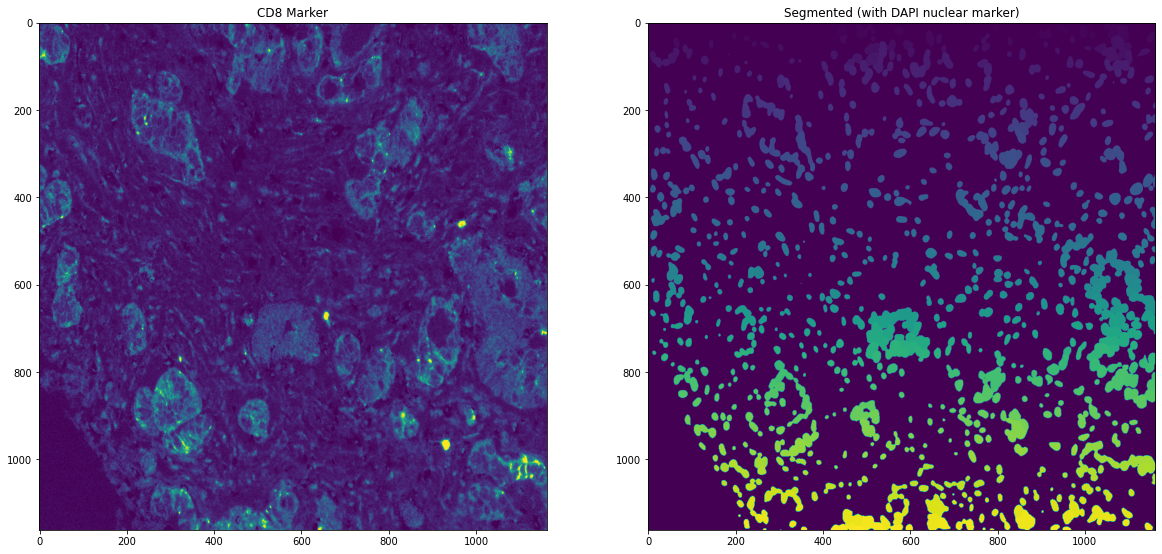

In [90]:
labeled_marker2 = app.predict(marker2, image_mpp=0.5)
fig, ax = plt.subplots(1,2, figsize=(20, 20))
ax[0].set_title("CD8 Marker")
ax[0].imshow(marker2[0,...,1])
ax[1].imshow(labeled_marker2[0,...,0])
ax[1].set_title("Segmented (with DAPI nuclear marker)")

### Marker 3: CK

Text(0.5, 1.0, 'Segmented (with DAPI nuclear marker)')

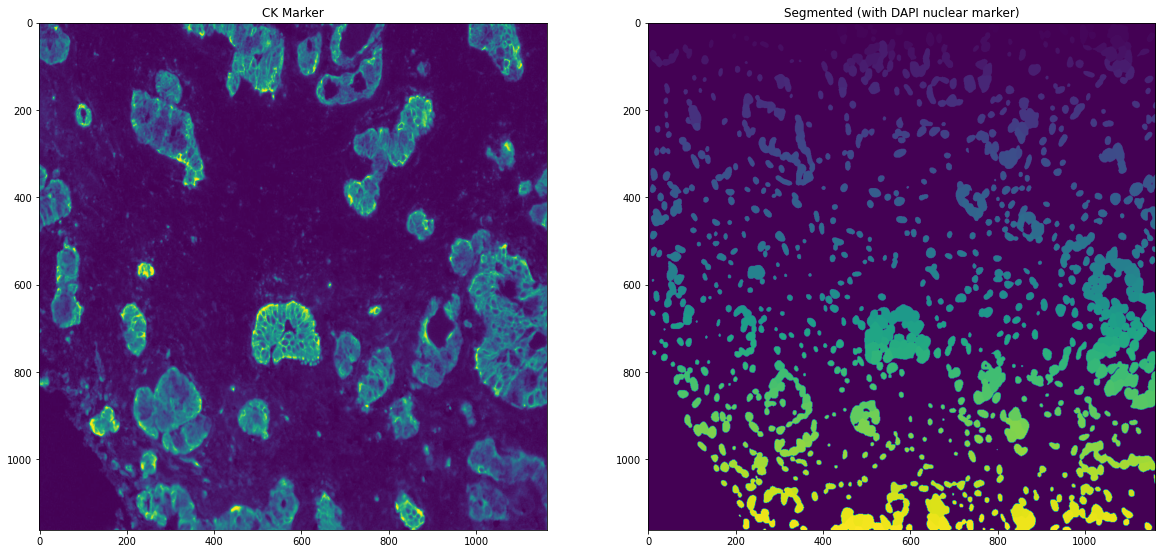

In [91]:
labeled_marker3 = app.predict(marker3, image_mpp=0.5)
fig, ax = plt.subplots(1,2, figsize=(20, 20))
ax[0].imshow(marker3[0,...,1])
ax[0].set_title("CK Marker")
ax[1].imshow(labeled_marker3[0,...,0])
ax[1].set_title("Segmented (with DAPI nuclear marker)")

### Marker 4: CD68

Text(0.5, 1.0, 'Segmented (with DAPI nuclear marker)')

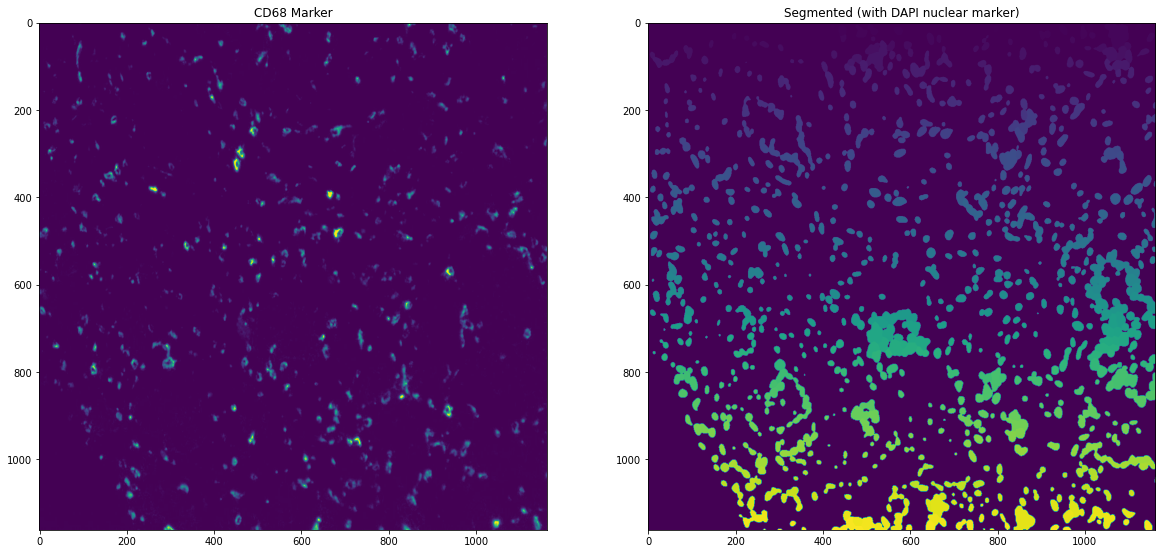

In [92]:
labeled_marker4 = app.predict(marker4, image_mpp=0.5)
fig, ax = plt.subplots(1,2, figsize=(20, 20))
ax[0].imshow(marker4[0,...,1])
ax[0].set_title("CD68 Marker")
ax[1].imshow(labeled_marker4[0,...,0])
ax[1].set_title("Segmented (with DAPI nuclear marker)")

### Marker 5: CD3

Text(0.5, 1.0, 'Segmented (with DAPI nuclear marker)')

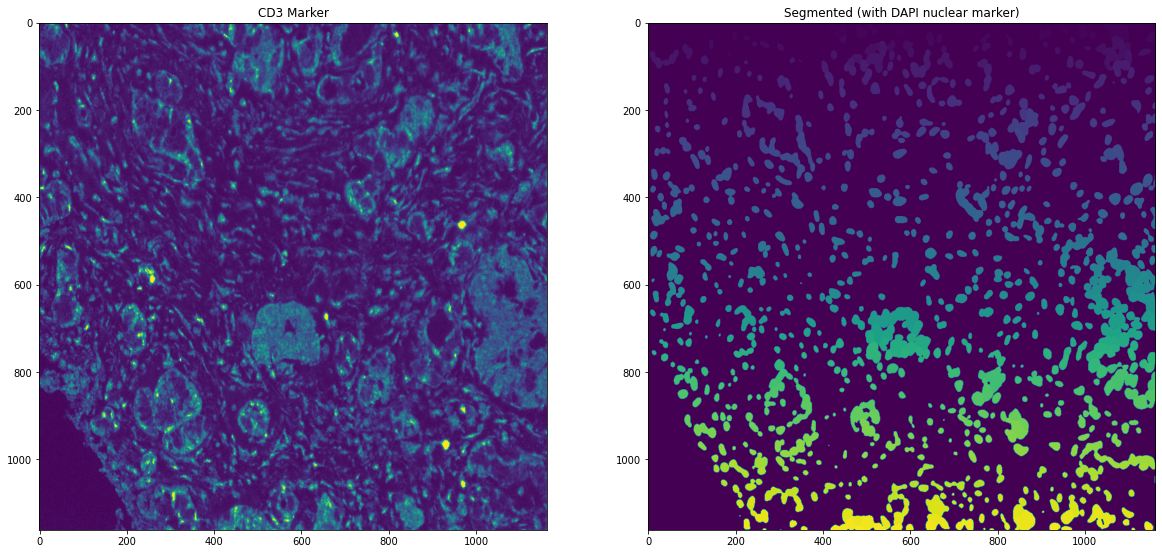

In [93]:
labeled_marker5 = app.predict(marker5, image_mpp=0.5)
fig, ax = plt.subplots(1,2, figsize=(20, 20))
ax[0].imshow(marker5[0,...,1])
ax[0].set_title("CD3 Marker")
ax[1].imshow(labeled_marker5[0,...,0])
ax[1].set_title("Segmented (with DAPI nuclear marker)")

# Centroids (with DAPI marker)

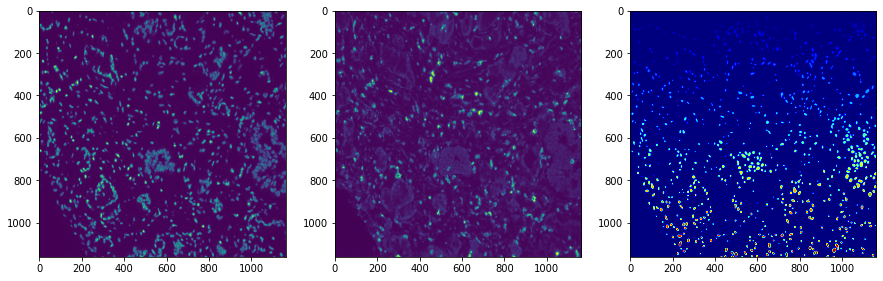

In [94]:
labeled_nuc_mark1 = app.predict(marker1, image_mpp=0.5, compartment = 'nuclear')
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(marker1[0, ..., 0])
ax[1].imshow(marker1[0, ..., 1])
ax[2].imshow(labeled_nuc_mark1[0, ..., 0], cmap = "jet")
plt.show()

In [95]:
from deepcell import image_generators
from deepcell.utils import train_utils

transforms = ['centroid', 'outer-distance', 'fgbg']
transforms_kwargs = {'outer-distance': {'erosion_width': 0}}

batch_size = 1
min_objects = 1

# use augmentation for training but not validation
datagen = image_generators.SemanticDataGenerator(
    rotation_range=180,
    shear_range=0,
    zoom_range=(0.75, 1.25),
    horizontal_flip=True,
    vertical_flip=True)

datagen_val = image_generators.SemanticDataGenerator(
    rotation_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=0,
    vertical_flip=0)

train_data = datagen.flow(
    {'X': X_train, 'y': y_train},
    seed=seed,
    transforms=transforms,
    transforms_kwargs=transforms_kwargs,
    min_objects=min_objects,
    batch_size=batch_size)

val_data = datagen_val.flow(
    {'X': X_test, 'y': y_test},
    seed=seed,
    transforms=transforms,
    transforms_kwargs=transforms_kwargs,
    min_objects=min_objects,
    batch_size=batch_size)


Text(0.5, 1.0, 'Foreground/Background')

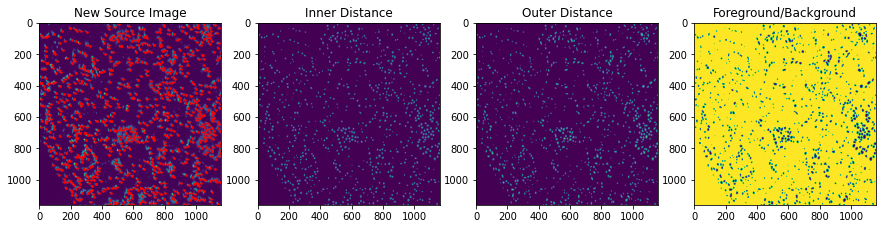

In [96]:
from skimage.feature import peak_local_max
from deepcell_toolbox.deep_watershed import deep_watershed

X_test_nuc = marker1
y_test_nuc = labeled_nuc_mark1
X_test_nuc = X_test_nuc[:,...,0]
X_test_nuc = X_test_nuc[:,...,np.newaxis]

val_data_nuc = datagen_val.flow(
    {'X': X_test_nuc, 'y': y_test_nuc},
    seed=seed,
    transforms=transforms,
    transforms_kwargs=transforms_kwargs,
    min_objects=min_objects,
    batch_size=batch_size)

inputs, outputs = val_data_nuc.next()

img = inputs[0]
inner_distance = outputs[0]
outer_distance = outputs[1]
fgbg = outputs[2]

coords = peak_local_max(
    inner_distance[0,...,0],
    min_distance=10,
    threshold_abs=0.1,
    exclude_border=False)

fig, axes = plt.subplots(1, 4, figsize=(15, 15))

axes[0].imshow(img[..., 0])
axes[0].set_title('New Source Image')
axes[0].scatter(coords[..., 1], coords[..., 0],
                color='r', marker='.', s=10)

axes[1].imshow(inner_distance[0, ..., 0])
axes[1].set_title('Inner Distance')

axes[2].imshow(outer_distance[0, ..., 0])
axes[2].set_title('Outer Distance')

axes[3].imshow(fgbg[0, ..., 0])
axes[3].set_title('Foreground/Background')

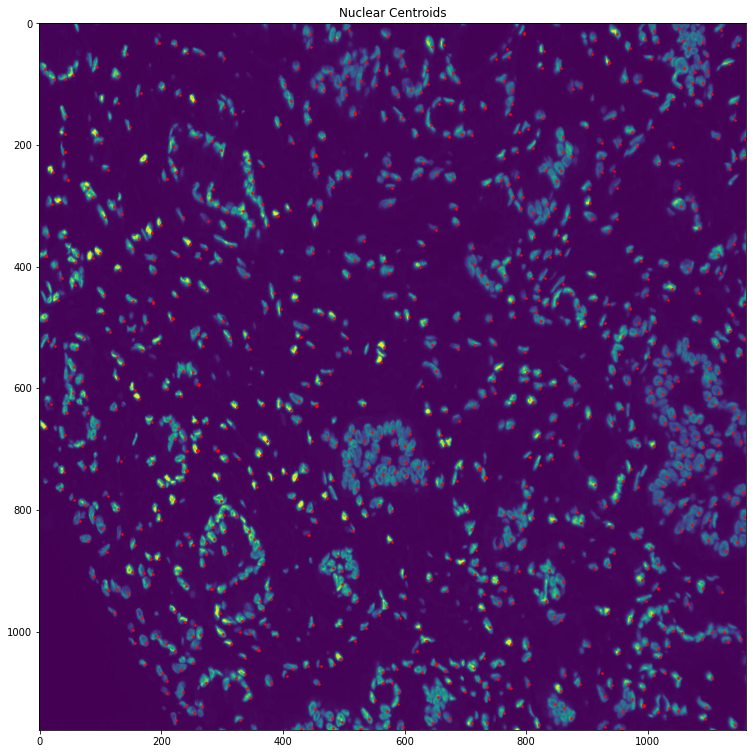

In [97]:
plt.figure(figsize=(13,13))
plt.imshow(img[..., 0])
plt.title("Nuclear Centroids")
plt.scatter(coords[..., 1], coords[..., 0],
                color='r', marker='.', s=10)

In [98]:
#Unsqueeze
r_nuc_im = Image.fromarray(marker1[0, ..., 0])
r_labeled_nuc_im = Image.fromarray(labeled_nuc_mark1[0, ..., 0])

r_nuc_im = r_nuc_im.resize((original_width, original_length))
r_labeled_nuc_im = r_labeled_nuc_im.resize((original_width, original_length)) #resize filter applied to obtain original aspect ratio

r_nuc_im = np.array(r_nuc_im)
r_labeled_nuc_im = np.array(r_labeled_nuc_im)

#plt.figure(figsize=(13,13))
#plt.imshow(r_labeled_nuc_im)





Text(0.5, 1.0, 'Resized Image')

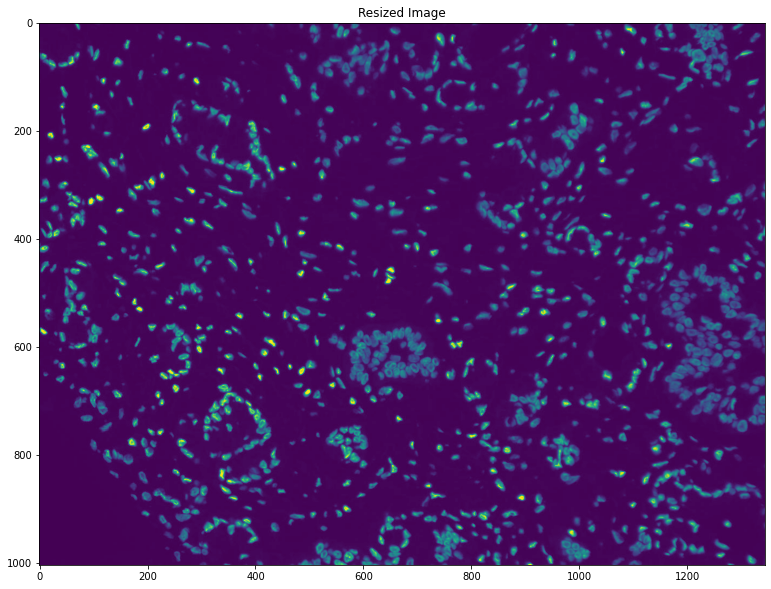

In [99]:
plt.figure(figsize=(13,13))
plt.imshow(r_nuc_im)
plt.title("Resized Image")

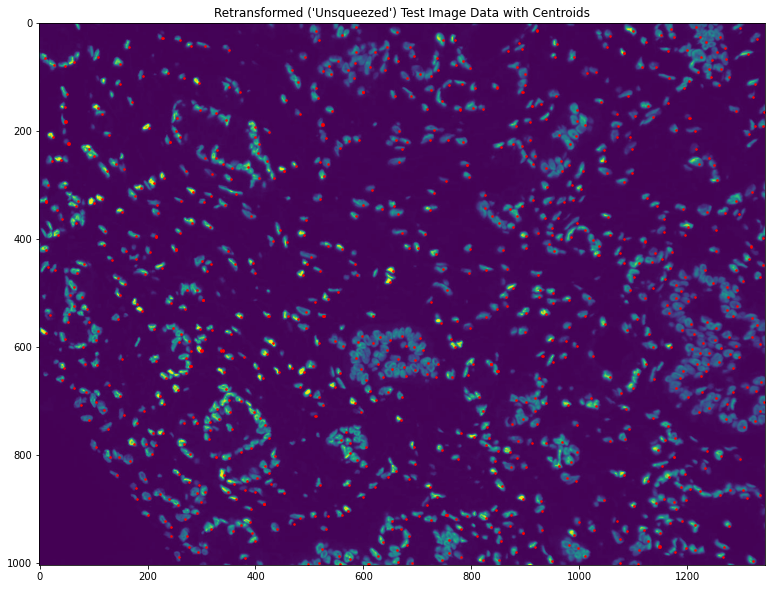

In [100]:
length_factor = sqrWidth/r_labeled_nuc_im.shape[1]
width_factor = sqrWidth/r_labeled_nuc_im.shape[0]

val_data_nuc = datagen_val.flow(
    {'X': X_test_nuc, 'y': y_test_nuc},
    seed=seed,
    transforms=transforms,
    transforms_kwargs=transforms_kwargs,
    min_objects=min_objects,
    batch_size=batch_size)

inputs, outputs = val_data_nuc.next()

img = inputs[0]
inner_distance = outputs[0]
outer_distance = outputs[1]
fgbg = outputs[2]

coords = peak_local_max(
    inner_distance[0,...,0],
    min_distance=10,
    threshold_abs=0.1,
    exclude_border=False)


coords[...,1] = np.dot(coords[...,1], width_factor)
coords[...,0] = np.dot(coords[...,0], length_factor)

plt.figure(figsize=(13,13))
plt.imshow(r_nuc_im)
plt.title('Retransformed (\'Unsqueezed\') Test Image Data with Centroids')
plt.scatter(coords[..., 1], coords[..., 0],
                color='r', marker='.', s=10)

In [101]:
    
def export_centroids(num_images):

    file_object  = open("Test Data Centroids.txt", "w")
    index = 0
    
    file_object.write("In each field of view(FOV), objects coordinates are ordered from decreasing y coordinates")
    file_object.write("(moving up along the image). If two objects have the same y coordinate, then ")
        
    for i in range(0, num_images):
          
        file_object.write("FOV #: " + str(index+1) + "\n")
        file_object.write("# of Objects: " + str(len(coords)) + "\n\n")
        
        file_object.write("[X1 X2 ....]:\n\n")
        file_object.write(str(coords[...,1])+"\n\n")
        
        file_object.write("[Y1 Y2 ....]:\n\n")
        file_object.write(str(coords[...,0])+"\n")
        file_object.write("\n")
        
        index+=1
        

    
    file_object.close() 
    
export_centroids(1)

## Intensity Extraction 

Text(0.5, 1.0, 'Segmented (with DAPI nuclear marker)')

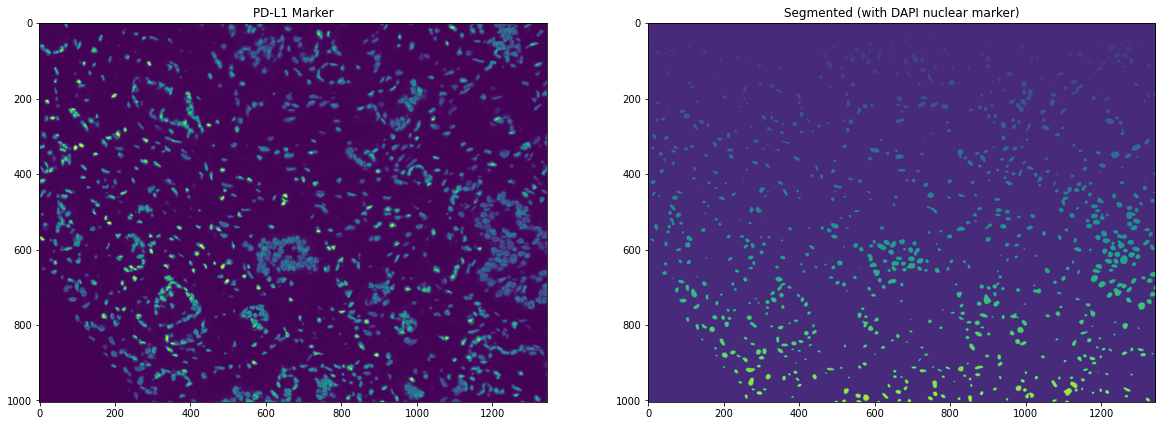

In [106]:
labeled_marker1 = app.predict(marker1, image_mpp=0.5)
fig, ax = plt.subplots(1,2, figsize=(20, 20))
ax[0].imshow(r_nuc_im)
ax[0].set_title("PD-L1 Marker")
ax[1].imshow(r_labeled_nuc_im)
ax[1].set_title("Segmented (with DAPI nuclear marker)")